In [6]:
from Experiment import Experiment

# Alanine Dipeptide

In [7]:
exp = Experiment(location='../exp/outputs/alanine_dipeptide/alanine_1us', features='dihedrals')

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 2 features.


In [8]:
exp.get_features()

['PHI 0 ALA 2', 'PSI 0 ALA 2']

KMeans iterations: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]  


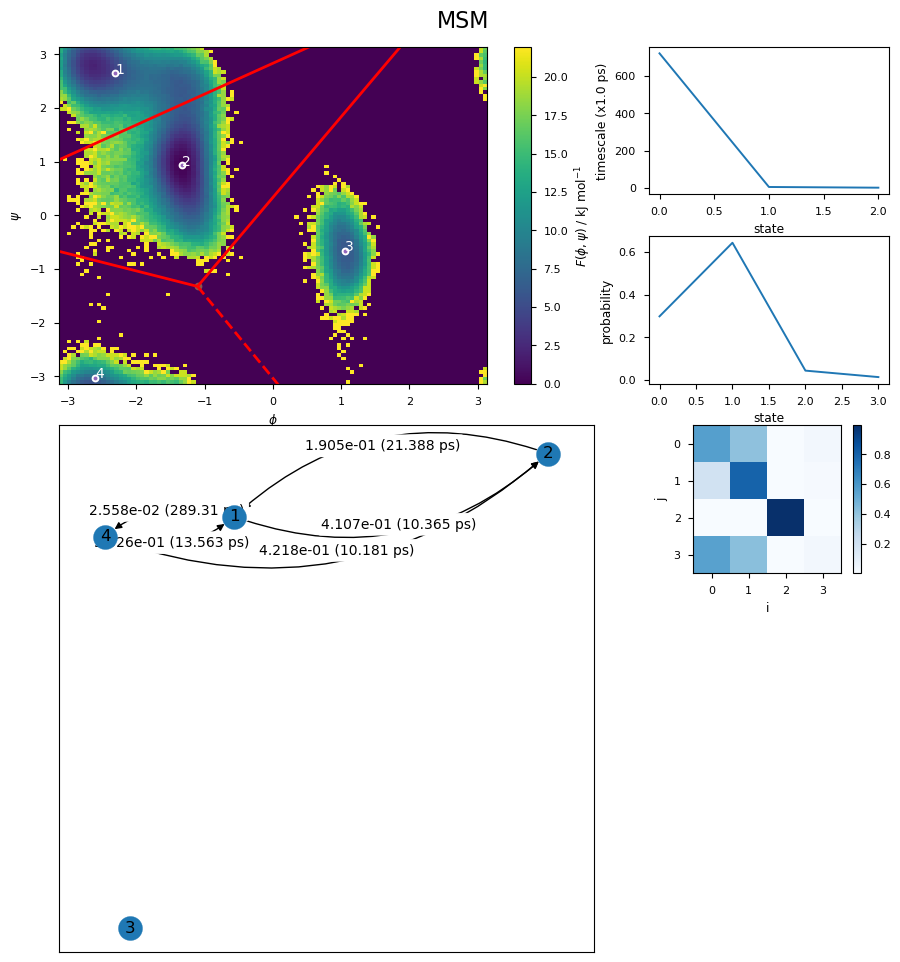

In [9]:
exp.markov_state_model(n_clusters=4, lagtime='4ps', features=['PHI 0 ALA 2', 'PSI 0 ALA 2'], feature_nicknames=['\phi', '\psi'])

# Chignolin

In [1]:
from Experiment import Experiment
exp = Experiment(location='../exp/outputs/chignolin/5us_NPT_chignolin_1uao', features='dihedrals')

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 18 features.


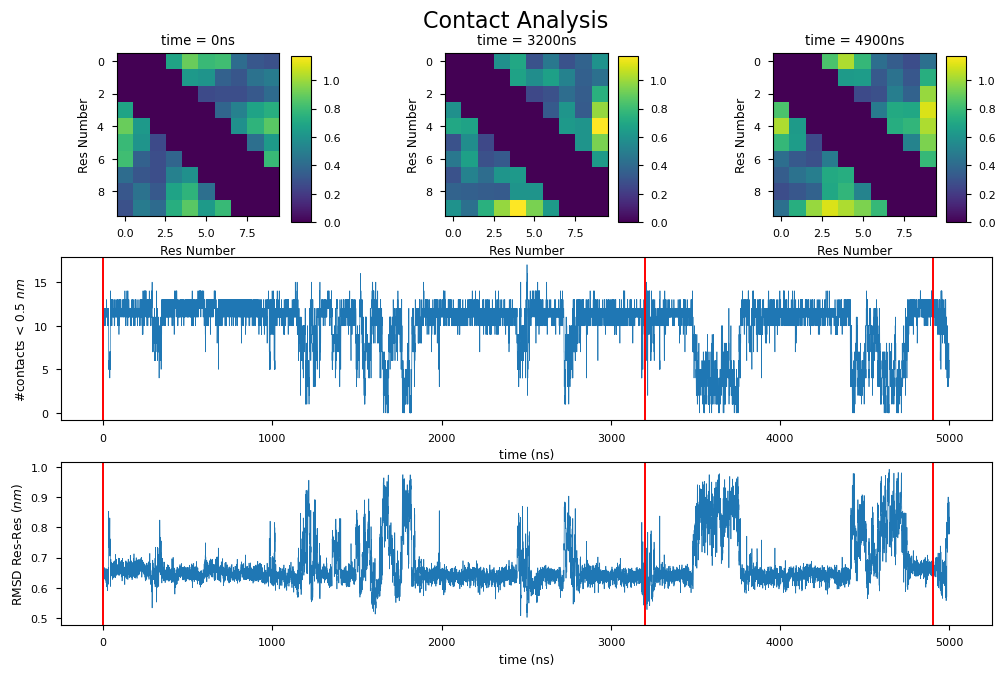

In [2]:
exp.contact_analysis(contact_threshold=0.5, times=['0ns', '3200ns', '4900ns'])

100%|██████████| 999/999 [00:02<00:00, 368.44it/s]


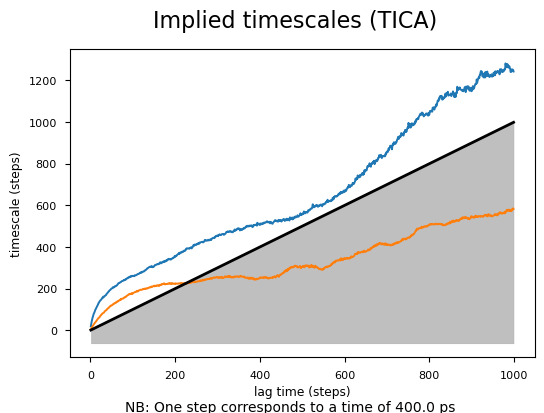

In [3]:
exp.implied_timescale_analysis(max_lag=1000, increment=1, yscale='linear')

In [4]:
print(exp.get_features())

['PHI 0 TYR 2', 'PSI 0 GLY 1', 'PHI 0 ASP 3', 'PSI 0 TYR 2', 'PHI 0 PRO 4', 'PSI 0 ASP 3', 'PHI 0 GLU 5', 'PSI 0 PRO 4', 'PHI 0 THR 6', 'PSI 0 GLU 5', 'PHI 0 GLY 7', 'PSI 0 THR 6', 'PHI 0 THR 8', 'PSI 0 GLY 7', 'PHI 0 TRP 9', 'PSI 0 THR 8', 'PHI 0 GLY 10', 'PSI 0 TRP 9']


KMeans iterations: 100%|██████████| 21/21 [00:00<00:00, 96.29it/s]


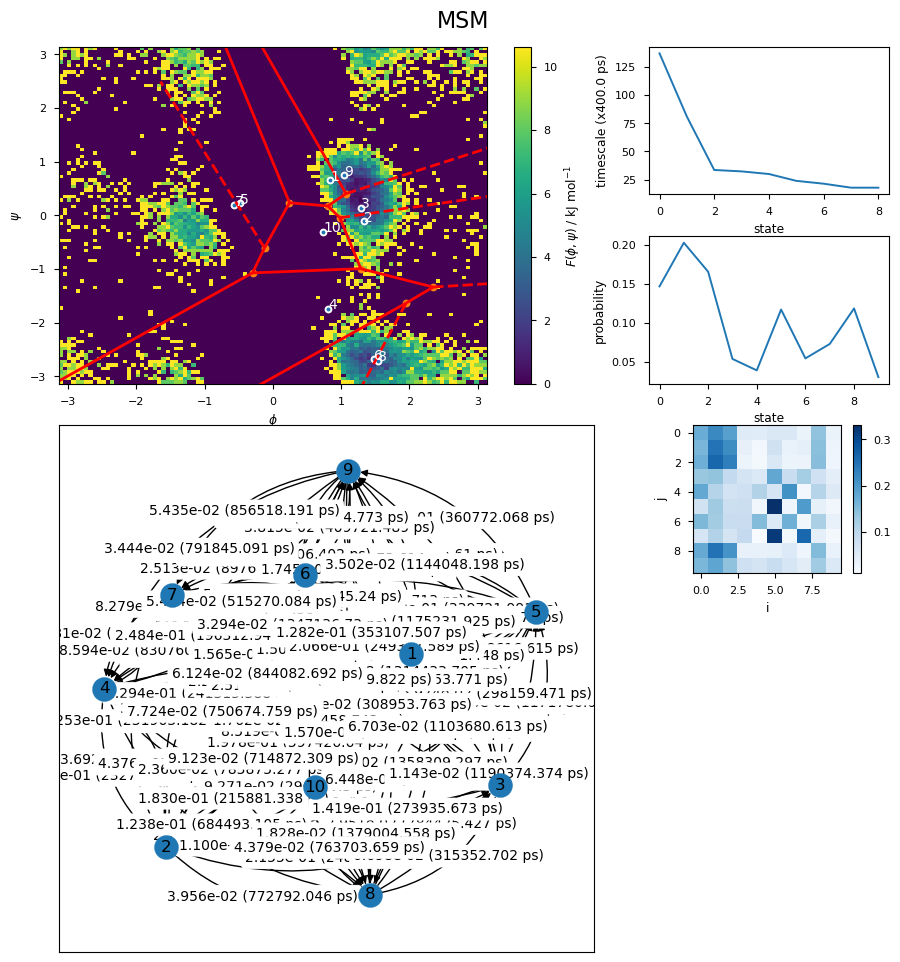

In [3]:
exp.markov_state_model(n_clusters=10, lagtime='40ns', features=['PHI 0 GLY 7', 'PSI 0 GLY 7'], feature_nicknames=['\phi', '\psi'])